<a href="https://colab.research.google.com/github/NiEl0503/estadistica-frecuencia-medidas/blob/main/Frequencias_e_Medidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Estatística Frequências e Medidas**

Você é uma pesquisadora de um cursinho para estudantes que querem
ingressar na universidade em 2025. Seu objetivo é retirar informações da
base de dados do enem do ano anterior para alinhar melhor as estratégias do
cursinho para cada estudante

In [ ]:
#importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
enem = pd.read_json('/content/enem_2023.json')

In [ ]:
enem.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


1. Qual das disciplinas tem a maior amplitude de nota?

In [ ]:
def calcular_amplitude(coluna):
    return enem[coluna].max() - enem[coluna].min()

disciplinas = ['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']

for disciplina in disciplinas:
    amplitude = calcular_amplitude(disciplina)
    print(f"A amplitude de {disciplina.lower()} é: {amplitude:.2f}")


A amplitude de linguagens é: 517.46
A amplitude de ciências humanas é: 474.02
A amplitude de ciências da natureza é: 487.60
A amplitude de matemática é: 488.08
A amplitude de redação é: 729.16


**A disclipina con maior amplitude de nota é redação com 729.16**

2. a) Qual é a média para cada uma das disciplinas?

In [ ]:
media_enem = enem[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].mean()
media_enem

,0
Linguagens,514.524809
Ciências humanas,527.042281
Ciências da natureza,499.315583
Matemática,535.965660
Redação,637.783532


2. b) Qual é a mediana para cada uma das disciplinas? (Lembre-se
de remover todos os valores nulos quando considerar a mediana)


In [ ]:
enem_dropna = enem.dropna()
enem_dropna

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem
5,616.043360,502.007005,497.777935,615.902547,507.365147,Homem
...,...,...,...,...,...,...
990,510.183170,549.132853,557.957321,494.758023,795.671459,Mulher
993,460.925597,382.509978,528.010191,531.189617,579.596477,Mulher
994,502.990616,552.407982,554.934948,485.703584,566.635561,Homem
996,457.755594,444.616952,542.028624,419.689692,715.984249,Mulher


In [ ]:
enem_mediana = enem_dropna[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].median()
enem_mediana

,0
Linguagens,517.128831
Ciências humanas,528.503263
Ciências da natureza,502.935209
Matemática,532.961486
Redação,639.602691


3. Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:
a. Redação - 2
b. Matemática e suas Tecnologias - 4
c. Linguagens, Códigos e suas Tecnologias - 2
d. Ciências Humanas e suas Tecnologias - 1
e. Ciências da Natureza e suas Tecnologias - 1
Qual o desvio padrão e média das notas dos 500 estudantes mais bem
colocados considerando esses pesos?


In [ ]:
pesos = {
    'Redação': 2,
    'Matemática': 4,
    'Linguagens': 2,
    'Ciências humanas': 1,
    'Ciências da natureza': 1
}

# Nota ponderada para cada estudante
enem['Nota Ponderada'] = (enem['Redação'] * pesos['Redação'] +
                          enem['Matemática'] * pesos['Matemática'] +
                          enem['Linguagens'] * pesos['Linguagens'] +
                          enem['Ciências humanas'] * pesos['Ciências humanas'] +
                          enem['Ciências da natureza'] * pesos['Ciências da natureza'])

# Ordenar os estudantes pela nota ponderada (descendente)
melhores_estudantes = enem.sort_values(by='Nota Ponderada', ascending=False)

# Selecionar os 500 melhores
melhores_estudantes.head(500)

media_melhores_estudantes = melhores_estudantes['Nota Ponderada'].mean()
desvio_padrao_melhores_estudantes = melhores_estudantes['Nota Ponderada'].std()

print(f"A media dos 500 melhores estudantes é: {media_melhores_estudantes:.2f}")
print(f"O desvio padrão dos 500 melhores estudantes é: {desvio_padrao_melhores_estudantes:.2f}")


A media dos 500 melhores estudantes é: 5496.50
O desvio padrão dos 500 melhores estudantes é: 461.50


4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?

In [ ]:
melhores_40_estudantes = enem.sort_values(by='Nota Ponderada', ascending=False).head(40)
variancia_melhores_estudantes =  melhores_40_estudantes['Nota Ponderada'].var()
# variancia_melhores_estudantes = melhores_40_estudantes['Nota Ponderada'].std() * melhores_40_estudantes['Nota Ponderada'].std()

media_40_melhores_estudantes = melhores_40_estudantes['Nota Ponderada'].mean()

print(f"A média da nota dos estudantes que entraram no curso de ciência da computação é: {media_40_melhores_estudantes:.2f}")
print(f"A variância da nota dos estudantes que entraram no curso de ciência da computação é: {variancia_melhores_estudantes:.2f}")


A média da nota dos estudantes que entraram no curso de ciência da computação é: 6366.83
A variância da nota dos estudantes que entraram no curso de ciência da computação é: 29576.75


5. Qual o valor do teto do terceiro quartil para as disciplinas de
matemática e linguagens?

In [ ]:
# terceiro quartil para Matemática e Linguagens
terceiro_quartil_matematica = enem['Matemática'].quantile(0.75)
terceiro_quartil_linguagens = enem['Linguagens'].quantile(0.75)

# teto do terceiro quartil
teto_terceiro_quartil_matematica = np.ceil(terceiro_quartil_matematica)
teto_terceiro_quartil_linguagens = np.ceil(terceiro_quartil_linguagens)

print(f"O valor do teto do terceiro quartil para Matemática é: {teto_terceiro_quartil_matematica:.2f}")
print(f"O valor do teto do terceiro quartil para Linguagens é: {teto_terceiro_quartil_linguagens:.2f}")

O valor do teto do terceiro quartil para Matemática é: 593.00
O valor do teto do terceiro quartil para Linguagens é: 572.00


6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.


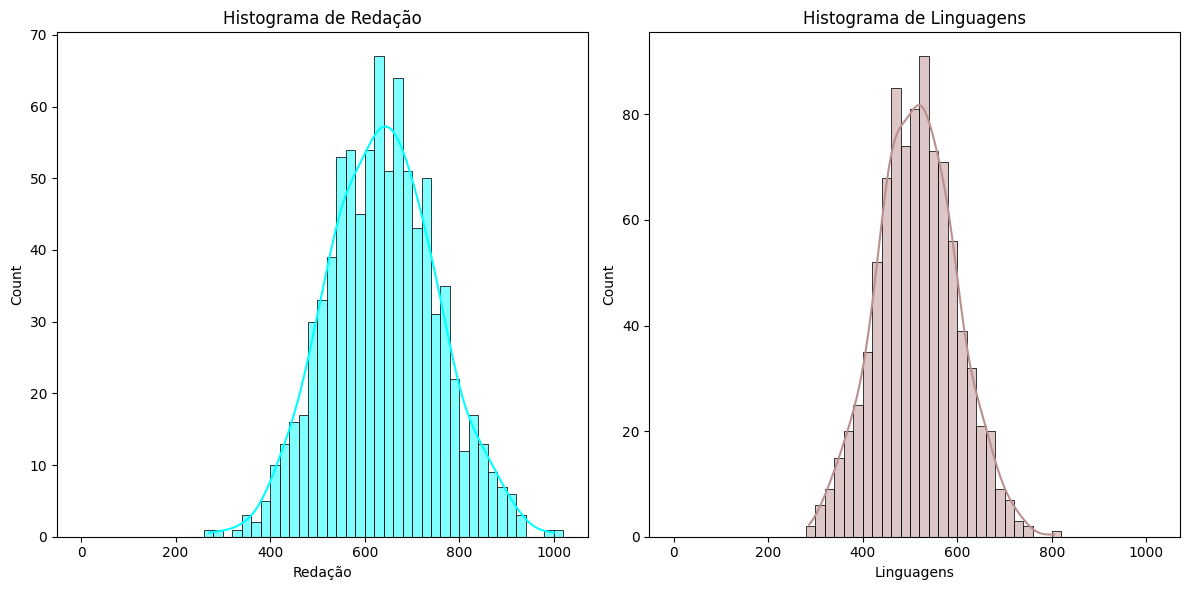

In [ ]:
bins = np.arange(0, 1021, 20)

plt.figure(figsize=(12, 6))

# Histograma de Redação
plt.subplot(1, 2, 1)
sns.histplot(enem["Redação"].dropna(), bins=bins, color='cyan', edgecolor='black', kde=True)
plt.title("Histograma de Redação")

# Histograma de Linguagens
plt.subplot(1, 2, 2)
sns.histplot(enem["Linguagens"].dropna(), bins=bins, color='rosybrown', edgecolor='black', kde=True)
plt.title("Histograma de Linguagens")

plt.tight_layout()
plt.show()

Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?

Considerando que a média para Linguagem é: 514,52 e a média para Redação é: 637,78 podemos ver que a maior parte dos dados está concentrada em torno da média, com as frequências diminuindo de forma relativamente simétrica à medida que nos afastamos para a esquerda e para a direita. Portanto posso inferir que ambos os histogramas são **SIMÉTRICOS**.

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])


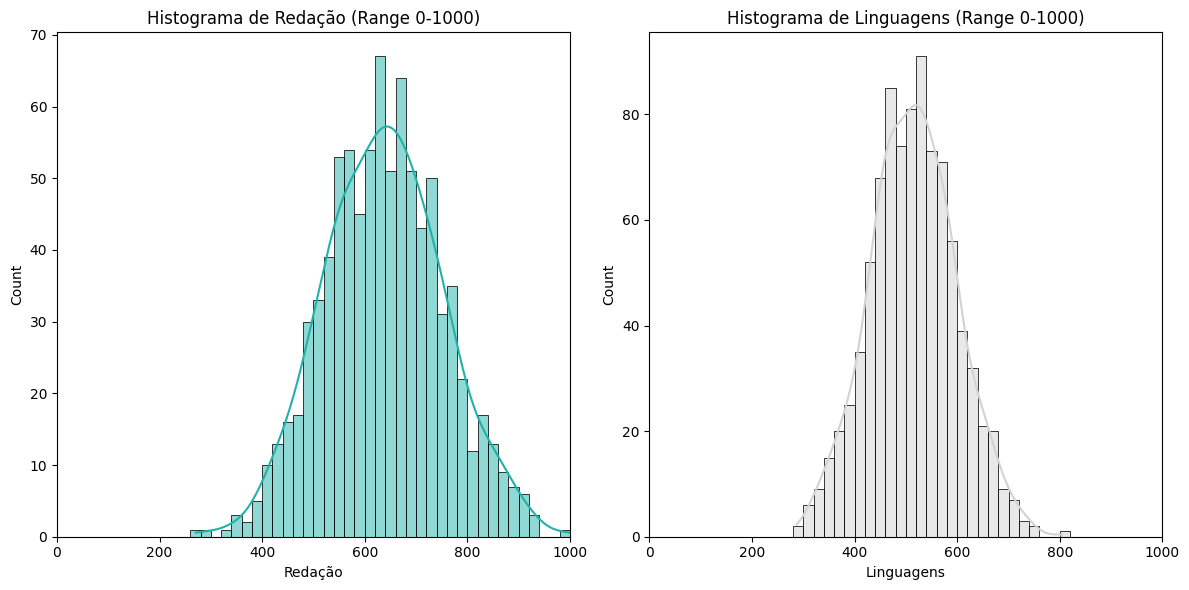

In [ ]:
bins = np.arange(0, 1021, 20)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(enem["Redação"].dropna(), bins=bins, color='lightseagreen', edgecolor='black', kde=True)
plt.xlim([0, 1000])
plt.title("Histograma de Redação (Range 0-1000)")

plt.subplot(1, 2, 2)
sns.histplot(enem["Linguagens"].dropna(), bins=bins, color='lightgray', edgecolor='black', kde=True)
plt.xlim([0, 1000])
plt.title("Histograma de Linguagens (Range 0-1000)")

plt.tight_layout()
plt.show()


 **Histograma de Redação:** o histograma apresenta uma **assimetria negativa**. Isso significa que a distribuição não é perfeitamente simétrica, pois a cauda esquerda é mais longa.

 **Histograma de Linguagens:** Ainda próximo de simétrico, mas com uma **leve assimetria negativa**.

 Portanto, com a inclusão do range fixo, minha opinião sobre a simetria das distribuições mudou. O histograma de Redação é claramente assimétrico e o de Linguagens, embora ainda simétrico, mostra uma leve tendência à assimetria.

8. Faça um boxplot do quartil de todas as disciplinas de ciências da
natureza e redação. É possível enxergar outliers? Utilize o método IQR

Número de outliers por disciplina: {'Ciências da natureza': 3, 'Redação': 4}




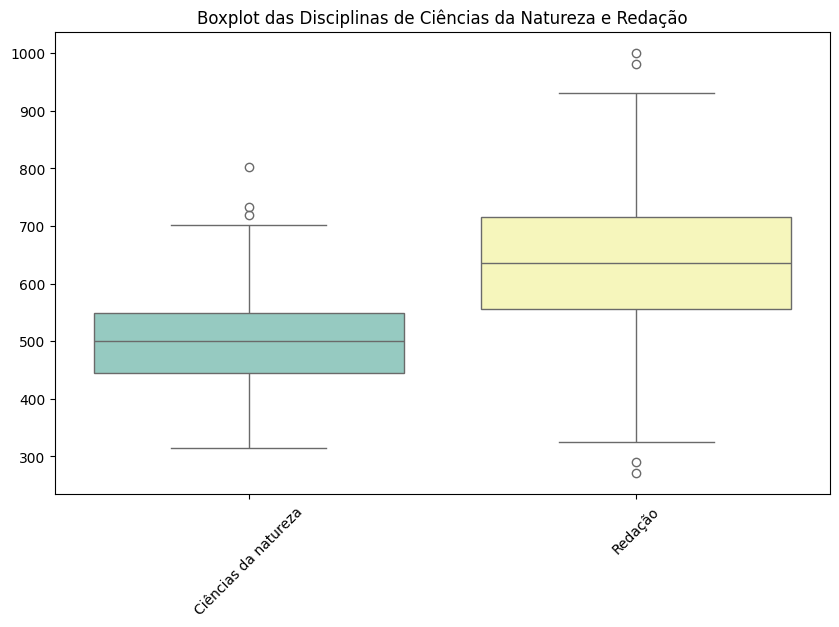

In [ ]:
disciplinas = enem[['Ciências da natureza', 'Redação']]

# Calcula o IQR e identifica os outliers
def calcular_outliers(df):
    outliers = {}
    for coluna in df.columns:
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        outliers[coluna] = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)].shape[0]
    return outliers

outliers = calcular_outliers(disciplinas)
print("Número de outliers por disciplina:", outliers)


# Cria o boxplot
print("\n")
plt.figure(figsize=(10, 6))
sns.boxplot(data=disciplinas, palette="Set3")
plt.title("Boxplot das Disciplinas de Ciências da Natureza e Redação")
plt.xticks(rotation=45)
plt.show()

9. Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um
valor acima de 5%)


Médias antes da remoção dos outliers:
Ciências da natureza    499.315583
Redação                 637.783532
Linguagens              514.524809
Ciências humanas        527.042281
Matemática              535.965660
dtype: float64

Médias após a remoção dos outliers:
Ciências da natureza    501.277468
Redação                 640.816727
Linguagens              517.148584
Ciências humanas        527.454289
Matemática              535.736223
dtype: float64

Mudança percentual nas médias:
Ciências da natureza    0.392915
Redação                 0.475584
Linguagens              0.509941
Ciências humanas        0.078174
Matemática             -0.042808
dtype: float64

Mudança significativa (> 5%):
Ciências da natureza    False
Redação                 False
Linguagens              False
Ciências humanas        False
Matemática              False
dtype: bool


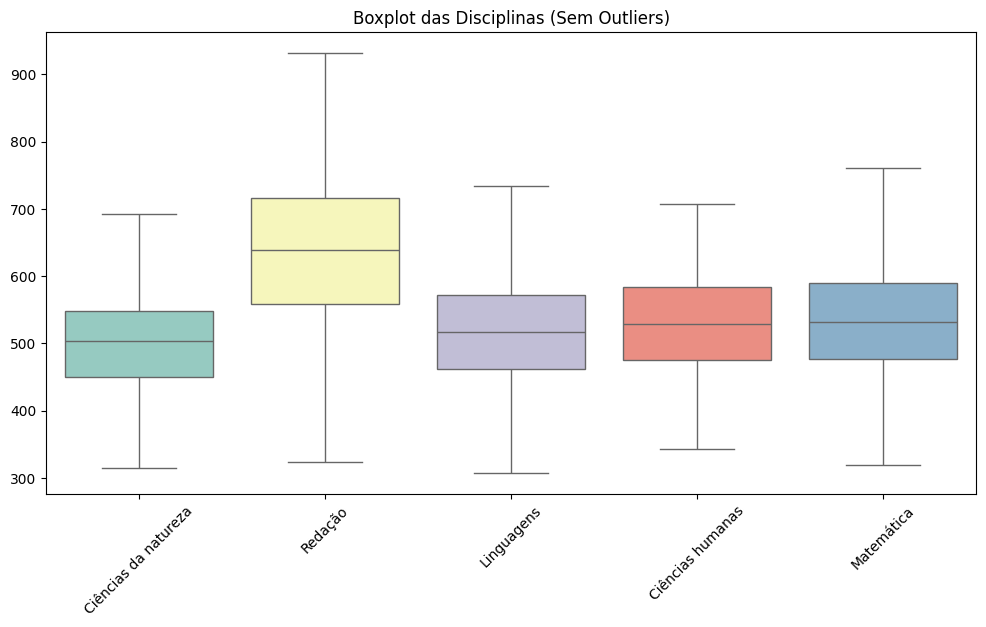

In [ ]:
disciplinas = enem[['Ciências da natureza', 'Redação', 'Linguagens', 'Ciências humanas', 'Matemática']]

# Função para calcular o IQR e remover outliers
def remover_outliers(df):
    df_sem_outliers = df.copy()
    for coluna in df.columns:
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df_sem_outliers = df_sem_outliers[(df_sem_outliers[coluna] >= limite_inferior) & (df_sem_outliers[coluna] <= limite_superior)]
    return df_sem_outliers

# Calcula a média antes de remover os outliers
media_antes = disciplinas.mean()

# Remove os outliers
disciplinas_sem_outliers = remover_outliers(disciplinas)

# Calcula a média após remover os outliers
media_depois = disciplinas_sem_outliers.mean()

# Calcula a mudança percentual nas médias
mudanca_percentual = ((media_depois - media_antes) / media_antes) * 100

# Exibe as médias antes e depois da remoção dos outliers
print("Médias antes da remoção dos outliers:")
print(media_antes)
print("\nMédias após a remoção dos outliers:")
print(media_depois)
print("\nMudança percentual nas médias:")
print(mudanca_percentual)

# Verifica se a mudança é significativa (> 5%)
mudanca_significativa = mudanca_percentual.abs() > 5
print("\nMudança significativa (> 5%):")
print(mudanca_significativa)

# Boxplot após remoção dos outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=disciplinas_sem_outliers, palette="Set3")
plt.title("Boxplot das Disciplinas (Sem Outliers)")
plt.xticks(rotation=45)
plt.show()

**Eliminando todos os outliers, descobriu-se que
 a média nacional não varia significativamente**

10. Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou
mediana? Substitua o valor por todos os três e diga qual delas altera
menos a média geral e o desvio padrão.

In [ ]:
disciplinas = enem[['Ciências da natureza', 'Redação', 'Linguagens', 'Ciências humanas', 'Matemática']]

# Função para calcular a média, moda e mediana
def calcular_medidas(df):
    medias = df.mean()
    modas = df.mode().iloc[0]  # Moda pode retornar múltiplos valores, então escolhemos o primeiro
    medianas = df.median()
    return medias, modas, medianas

# Calcula as medidas de tendência central
media, moda, mediana = calcular_medidas(disciplinas)

# Função para substituir valores nulos por uma medida e calcular estatísticas
def substituir_e_calcular(df, substituicao):
    df_substituido = df.fillna(substituicao)
    media_geral = df_substituido.mean()
    desvio_padrao = df_substituido.std()
    return media_geral, desvio_padrao

# Calcula a média e o desvio padrão originais
media_original = disciplinas.mean()
desvio_padrao_original = disciplinas.std()

# Substitui os valores nulos por média, moda e mediana
media_substituicao, desvio_padrao_media = substituir_e_calcular(disciplinas, media)
moda_substituicao, desvio_padrao_moda = substituir_e_calcular(disciplinas, moda)
mediana_substituicao, desvio_padrao_mediana = substituir_e_calcular(disciplinas, mediana)

# Exibe os resultados
print("Média original:")
print(media_original)
print("\nDesvio padrão original:")
print(desvio_padrao_original)

print("\nSubstituição por Média:")
print("Média geral:")
print(media_substituicao)
print("Desvio padrão:")
print(desvio_padrao_media)

print("\nSubstituição por Moda:")
print("Média geral:")
print(moda_substituicao)
print("Desvio padrão:")
print(desvio_padrao_moda)

print("\nSubstituição por Mediana:")
print("Média geral:")
print(mediana_substituicao)
print("Desvio padrão:")
print(desvio_padrao_mediana)

# Calcula a mudança percentual na média e desvio padrão
def calcular_mudanca_percentual(original, substituicao):
    return ((substituicao - original) / original).abs() * 100

mudanca_media_percentual = calcular_mudanca_percentual(media_original, media_substituicao)
mudanca_desvio_padrao_percentual = calcular_mudanca_percentual(desvio_padrao_original, desvio_padrao_media)

print("\nMudança percentual na média (substituição por média):")
print(mudanca_media_percentual)
print("Mudança percentual no desvio padrão (substituição por média):")
print(mudanca_desvio_padrao_percentual)

mudanca_moda_media_percentual = calcular_mudanca_percentual(media_original, moda_substituicao)
mudanca_moda_desvio_padrao_percentual = calcular_mudanca_percentual(desvio_padrao_original, desvio_padrao_moda)

print("\nMudança percentual na média (substituição por moda):")
print(mudanca_moda_media_percentual)
print("Mudança percentual no desvio padrão (substituição por moda):")
print(mudanca_moda_desvio_padrao_percentual)

mudanca_mediana_media_percentual = calcular_mudanca_percentual(media_original, mediana_substituicao)
mudanca_mediana_desvio_padrao_percentual = calcular_mudanca_percentual(desvio_padrao_original, desvio_padrao_mediana)

print("\nMudança percentual na média (substituição por mediana):")
print(mudanca_mediana_media_percentual)
print("Mudança percentual no desvio padrão (substituição por mediana):")
print(mudanca_mediana_desvio_padrao_percentual)

Média original:
Ciências da natureza    499.315583
Redação                 637.783532
Linguagens              514.524809
Ciências humanas        527.042281
Matemática              535.965660
dtype: float64

Desvio padrão original:
Ciências da natureza     78.760404
Redação                 115.339972
Linguagens               84.009313
Ciências humanas         77.811519
Matemática               86.648100
dtype: float64

Substituição por Média:
Média geral:
Ciências da natureza    499.315583
Redação                 637.783532
Linguagens              514.524809
Ciências humanas        527.042281
Matemática              535.965660
dtype: float64
Desvio padrão:
Ciências da natureza     71.486677
Redação                 106.953175
Linguagens               79.560718
Ciências humanas         75.277806
Matemática               83.286987
dtype: float64

Substituição por Moda:
Média geral:
Ciências da natureza    466.770440
Redação                 586.411433
Linguagens              491.089754
Ciên

###**Análise dos Resultados**

**Mudanças na média:**

Substituição pela média:

As mudanças na média são praticamente insignificantes. Isso sugere que a substituição pela média quase não altera a média original.

Substituição pela moda:

As mudanças na média são significativas, com valores que variam entre aproximadamente 2,88% e 8,05%.

Substituição pela mediana:

As mudanças na média são muito pequenas (aproximadamente entre 0,01% e 0,055%).

**Mudanças no desvio padrão:**

Substituição pela média:

As mudanças no desvio padrão são relativamente pequenas, com valores que variam de 3,25% a 9,23%.

Substituição pela moda:

Aqui as mudanças são muito maiores, variando aproximadamente de 16,68% a 44,21%, o que indica que a moda altera significativamente o desvio padrão.

Substituição pela mediana:

As mudanças são semelhantes às da substituição pela média (entre 3,25% e 9,23%).

**A substituição pela média** altera menos a média geral (praticamente não a muda) e também produz mudanças moderadas no desvio padrão.

**A substituição pela mediana** também produz mudanças muito pequenas na média e semelhantes no desvio padrão às da média.

**A substituição pela moda** causa as maiores mudanças tanto na média quanto no desvio padrão, o que indica que é a pior opção das três.

**A substituição pela média parece ser a melhor opção, pois altera minimamente a média geral e mantém uma mudança moderada no desvio padrão.**